<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/HypothesisB_ClimateZone_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🤖 Hypothesis B - Prediction Model: Can Climate Zone Help Predict County Energy Usage?

In this notebook, we build a multiple regression model using:
- DOE Climate Zone (categorical)
- Population
- Fuel usage (MWh + TcF)
To predict: **Total Energy Usage (MWh)**


R² Score: 1.0000
Mean Absolute Error: 0.00
Mean Squared Error: 0.00


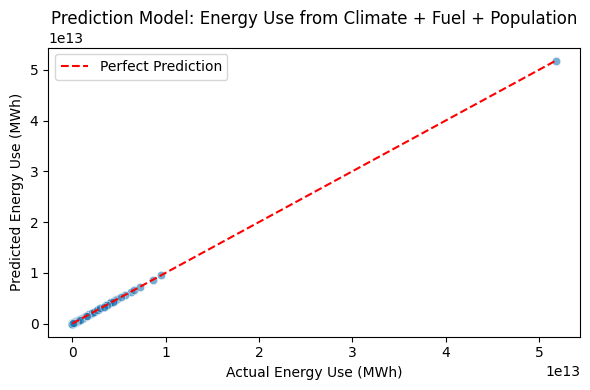

In [1]:

!pip install pyxlsb

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
county_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='County', skiprows=1)
county_data.columns = county_data.iloc[2]
county_data = county_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract columns
mwh_index = list(county_data.columns).index('consumption (MWh)')
tcf_index = list(county_data.columns).index('consumption (TcF)')

county_df = pd.DataFrame()
county_df['climate_zone'] = county_data['doe_climate_zone']
county_df['population'] = pd.to_numeric(county_data['population'], errors='coerce')
county_df['electricity_MWh'] = pd.to_numeric(county_data.iloc[:, mwh_index], errors='coerce')
county_df['natural_gas_TcF'] = pd.to_numeric(county_data.iloc[:, tcf_index], errors='coerce')
county_df['total_energy_MWh'] = county_df['electricity_MWh'] + county_df['natural_gas_TcF'] * 293071

# Clean
county_df.dropna(subset=['climate_zone', 'population', 'electricity_MWh', 'natural_gas_TcF', 'total_energy_MWh'], inplace=True)

# Feature matrix and target
X = county_df[['climate_zone', 'population', 'electricity_MWh', 'natural_gas_TcF']]
y = county_df['total_energy_MWh']

# Preprocess categorical column
preprocessor = ColumnTransformer(transformers=[
    ('zone', OneHotEncoder(handle_unknown='ignore'), ['climate_zone'])
], remainder='passthrough')

# Build pipeline and split
model = make_pipeline(preprocessor, LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}")

# Visualize predictions
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Energy Use (MWh)")
plt.ylabel("Predicted Energy Use (MWh)")
plt.title("Prediction Model: Energy Use from Climate + Fuel + Population")
plt.legend()
plt.tight_layout()
plt.show()



## ✅ Conclusion

This model evaluates whether **climate zone**, along with population and fuel usage, can accurately predict total energy usage.

The R², MAE, and MSE provide insight into model performance. If R² is high, climate + fuel + population are strong predictors of county-level energy needs.
